# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Dataset

In [2]:
data=pd.read_csv("autos_preprocessed.csv",header=0,sep=',',encoding='Latin1',)

In [3]:
data.head()

,Unnamed: 0,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,1,18300,coupe,2011,manual,190,not-declared,125000,5,diesel,audi,Yes
1,2,9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,not-declared
2,3,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,No
3,4,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,No
4,5,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,Yes


# Label encoding the categorical data

In [4]:
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

mapper = {}
for i in labels:
    mapper[i] = LabelEncoder()
    mapper[i].fit(data[i])
    tr = mapper[i].transform(data[i])
    np.save(str('classes'+i+'.npy'), mapper[i].classes_)
    data.loc[:, i+'_labels'] = pd.Series(tr, index=data.index)
    
labeled = data[['price', 'yearOfRegistration','powerPS','kilometer','monthOfRegistration']
                  +[x+"_labels" for x in labels]]

print(labeled.columns)

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278578 entries, 0 to 278577
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                278578 non-null  int64 
 1   price                     278578 non-null  int64 
 2   vehicleType               278578 non-null  object
 3   yearOfRegistration        278578 non-null  int64 
 4   gearbox                   278578 non-null  object
 5   powerPS                   278578 non-null  int64 
 6   model                     278578 non-null  object
 7   kilometer                 278578 non-null  int64 
 8   monthOfRegistration       278578 non-null  int64 
 9   fuelType                  278578 non-null  object
 10  brand                     278578 non-null  object
 11  notRepairedDamage         278578 non-null  object
 12  gearbox_labels            278578 non-null  int64 
 13  notRepairedDamage_labels  278578 non-null  int64 
 14  mode

# Splitting Data Into Independent And Dependent Variables

In [6]:
Y = labeled.iloc[:,0].values

In [7]:
X= labeled.iloc[:,1:].values

In [8]:
Y=Y.reshape(-1,1)

In [9]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state = 3)

In [10]:
X_train

array([[  2002,    116, 150000, ...,     10,      1,      1],
       [  1999,    193, 150000, ...,     20,      7,      2],
       [  2011,    105,  50000, ...,     38,      1,      4],
       ...,
       [  1994,    102, 150000, ...,      2,      7,      4],
       [  1995,     60, 150000, ...,     24,      7,      7],
       [  2012,    313,  50000, ...,      1,      1,      1]])

In [11]:
Y_train

array([[ 1500],
       [ 5700],
       [13000],
       ...,
       [  800],
       [  800],
       [50000]])

In [12]:
X_test

array([[  2008,    140, 150000, ...,      1,      1,      4],
       [  2000,     60, 150000, ...,     38,      7,      7],
       [  2004,     54, 125000, ...,     38,      7,      7],
       ...,
       [  2001,    102, 150000, ...,     20,      7,      4],
       [  2003,    146, 150000, ...,      2,      7,      2],
       [  1999,     75, 150000, ...,     24,      7,      7]])

In [13]:
Y_test

array([[10000],
       [ 1500],
       [ 2699],
       ...,
       [ 1300],
       [ 5000],
       [  777]])

# Choose The Appropriate Model

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [15]:
regressor = RandomForestRegressor(n_estimators=1000,max_depth=10,random_state=34)

In [16]:
regressor.fit(X_train, np.ravel(Y_train,order='C'))

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=34)

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
r2=r2_score(Y_test,y_pred)
print("R2_score:",r2)

R2_score: 0.834527626497731


In [19]:
Adjusted_R2=1-(1-r2*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2:",Adjusted_R2)

Adjusted R2: 0.8346274945764857


In [20]:
from sklearn.metrics import mean_squared_error
import math

In [21]:
MSE=mean_squared_error(Y_test,y_pred)
print("MSE:",MSE)

MSE: 11837192.971239958


In [22]:
RMSE=math.sqrt(MSE)
print("RMSE:",RMSE)

RMSE: 3440.5221945570934


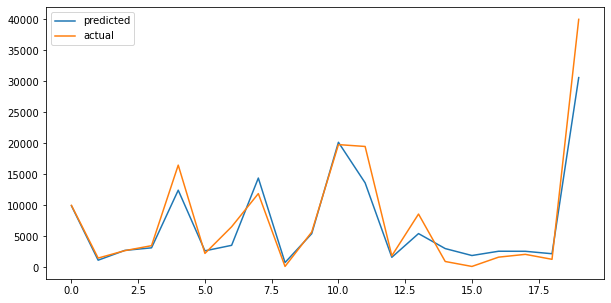

In [23]:
plt.figure(figsize=(10,5))
plt.plot(y_pred[0:20])
plt.plot(np.array(Y_test[0:20]))
plt.legend(["predicted","actual"])
plt.show()

# Save the model

In [25]:
filename='resale_model.sav'
pickle.dump(regressor,open(filename,'wb'))